In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('./체질검사.csv')
df_x = data.drop('FAT',axis=1)
df_y = data.FAT
data.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [7]:
df_x.corr()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
AGE,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
NECK,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
THIGH,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
KNEE,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507
ANKLE,-0.105058,0.613685,0.264744,0.477892,0.482988,0.453223,0.558387,0.539797,0.611608,1.000000,0.484855,0.419050,0.566195


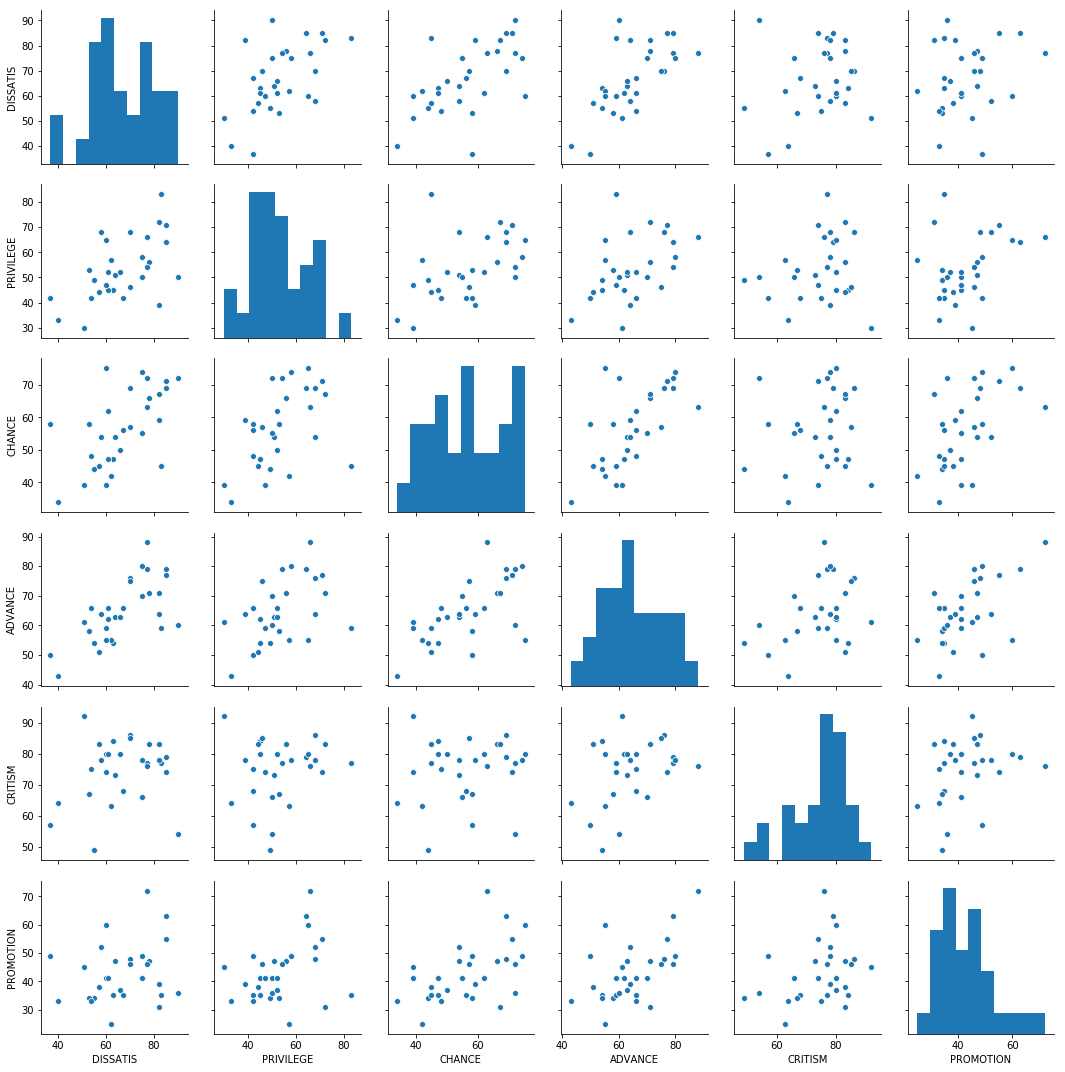

In [7]:
sns.pairplot(df_x)

In [8]:
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)
print("Scaled Data:\n {}".format(df_x_scaled[:5].round(3)))
print("Shape:\n {}".format(df_x_scaled.shape))

Scaled Data:
 [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape:
 (252, 13)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
pca = PCA(n_components=13)
x_pca = pca.fit_transform(df_x_scaled)
print("PCA Data:\n {}".format(x_pca[:5].round(3)))
print("PCA Shape:\n {}".format(x_pca.shape))
df_x_pca = pd.DataFrame(x_pca, columns=["Prin"+str(i) for i in range(1,14)])

PCA Data:
 [[ 1.5141e+01  7.4900e-01  1.7300e+00  2.9760e+00 -1.2010e+00  1.9160e+00
  -5.6500e-01  6.4200e-01 -7.1700e-01  6.6700e-01  1.1180e+00 -3.7400e-01
  -4.0200e-01]
 [-1.2570e+00 -1.7980e+00 -6.0400e-01 -4.0600e-01  1.3330e+00  8.2200e-01
   1.7400e-01 -1.0180e+00  3.7000e-02  3.7700e-01 -8.8000e-02 -1.1500e-01
  -2.1900e-01]
 [-7.2700e-01  2.3190e+00 -8.9200e-01  6.8300e-01 -5.0300e-01  6.0000e-01
  -5.1600e-01 -1.0000e-02  4.8000e-02 -2.6400e-01  1.7600e-01 -7.7000e-02
  -1.3600e-01]
 [-3.2100e+00  1.4650e+00  4.5800e-01 -5.7600e-01  2.0000e-02 -1.7900e-01
   7.1700e-01  8.4300e-01  2.1800e-01 -2.5500e-01 -2.3900e-01 -1.0100e-01
  -1.2200e-01]
 [ 3.2470e+00  2.2930e+00  1.8280e+00 -2.3000e-02 -4.0700e-01  1.1470e+00
   1.7010e+00 -1.0100e-01  5.4000e-01  3.0500e-01  4.6800e-01  2.7500e-01
   9.0000e-02]]
PCA Shape:
 (252, 13)


In [13]:
df_pca = pd.DataFrame()
df_pca["Prin"] = [i for i in range(1,14)]
df_pca["EigenValues"] = pca.explained_variance_
df_pca["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


In [14]:
df_feature = pd.DataFrame({'Feature':df_x.columns})
df_eigenvectors = pd.concat([df_feature, pd.DataFrame(pca.components_,columns=["Prin"+str(i) for i in range(1,14)])],axis=1)
df_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,AGE,0.009848,0.344544,0.101142,0.305593,0.316138,0.311798,0.325858,0.310089,0.308297,0.230527,0.299338,0.249741,0.279128
1,WEIGHT,0.750695,-0.018062,-0.468540,0.089567,0.209162,0.264617,0.003089,-0.123179,-0.049640,-0.224139,-0.049116,-0.134066,0.080844
2,HEIGHT,-0.419893,0.039220,-0.677696,-0.120770,0.061085,0.122093,0.220733,0.321658,-0.000818,-0.127712,0.075586,-0.070634,-0.387886
3,NECK,0.078998,0.086604,0.082155,-0.206422,-0.008786,0.119980,0.177524,0.076521,0.246723,0.500442,-0.322337,-0.682914,-0.058910
4,CHEST,0.040052,-0.141668,-0.484974,-0.054867,-0.152328,-0.229181,-0.162720,-0.096198,-0.005285,0.679062,0.034793,0.309955,0.264993
5,ABDOMEN,-0.293898,0.031015,-0.115178,0.560667,0.070230,-0.033121,-0.045068,-0.061968,-0.496745,0.032026,0.045138,-0.446451,0.352151
6,HIP,-0.033634,0.075993,0.134213,0.006849,0.450073,0.294549,-0.049180,-0.272742,-0.443076,0.346803,-0.149886,0.227530,-0.466989
7,THIGH,0.207081,-0.046546,0.101873,-0.114667,-0.060787,-0.086161,-0.101015,0.040924,-0.136696,0.166905,0.844594,-0.273351,-0.271707
8,KNEE,-0.152383,0.060701,0.004629,-0.702877,0.247865,0.140136,0.134090,-0.114674,-0.272481,-0.106135,0.129136,-0.034922,0.513250
9,ANKLE,0.261779,-0.018964,0.124187,-0.047839,-0.430544,0.086301,0.322799,0.522472,-0.540328,0.080132,-0.147119,0.152763,0.007215


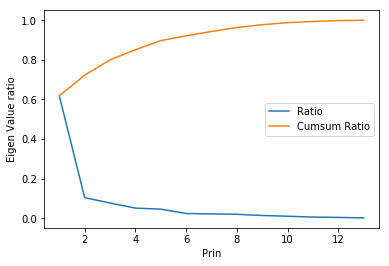

In [15]:
plt.plot(df_pca.Prin,df_pca.EigenValueRatio,label="Ratio")
plt.plot(df_pca.Prin, df_pca.CumsumEigenValueRatio,label="Cumsum Ratio")

plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc="best")

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
Prin1,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Prin5,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
Prin6,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
Prin7,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0
Prin8,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin9,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0
Prin10,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0


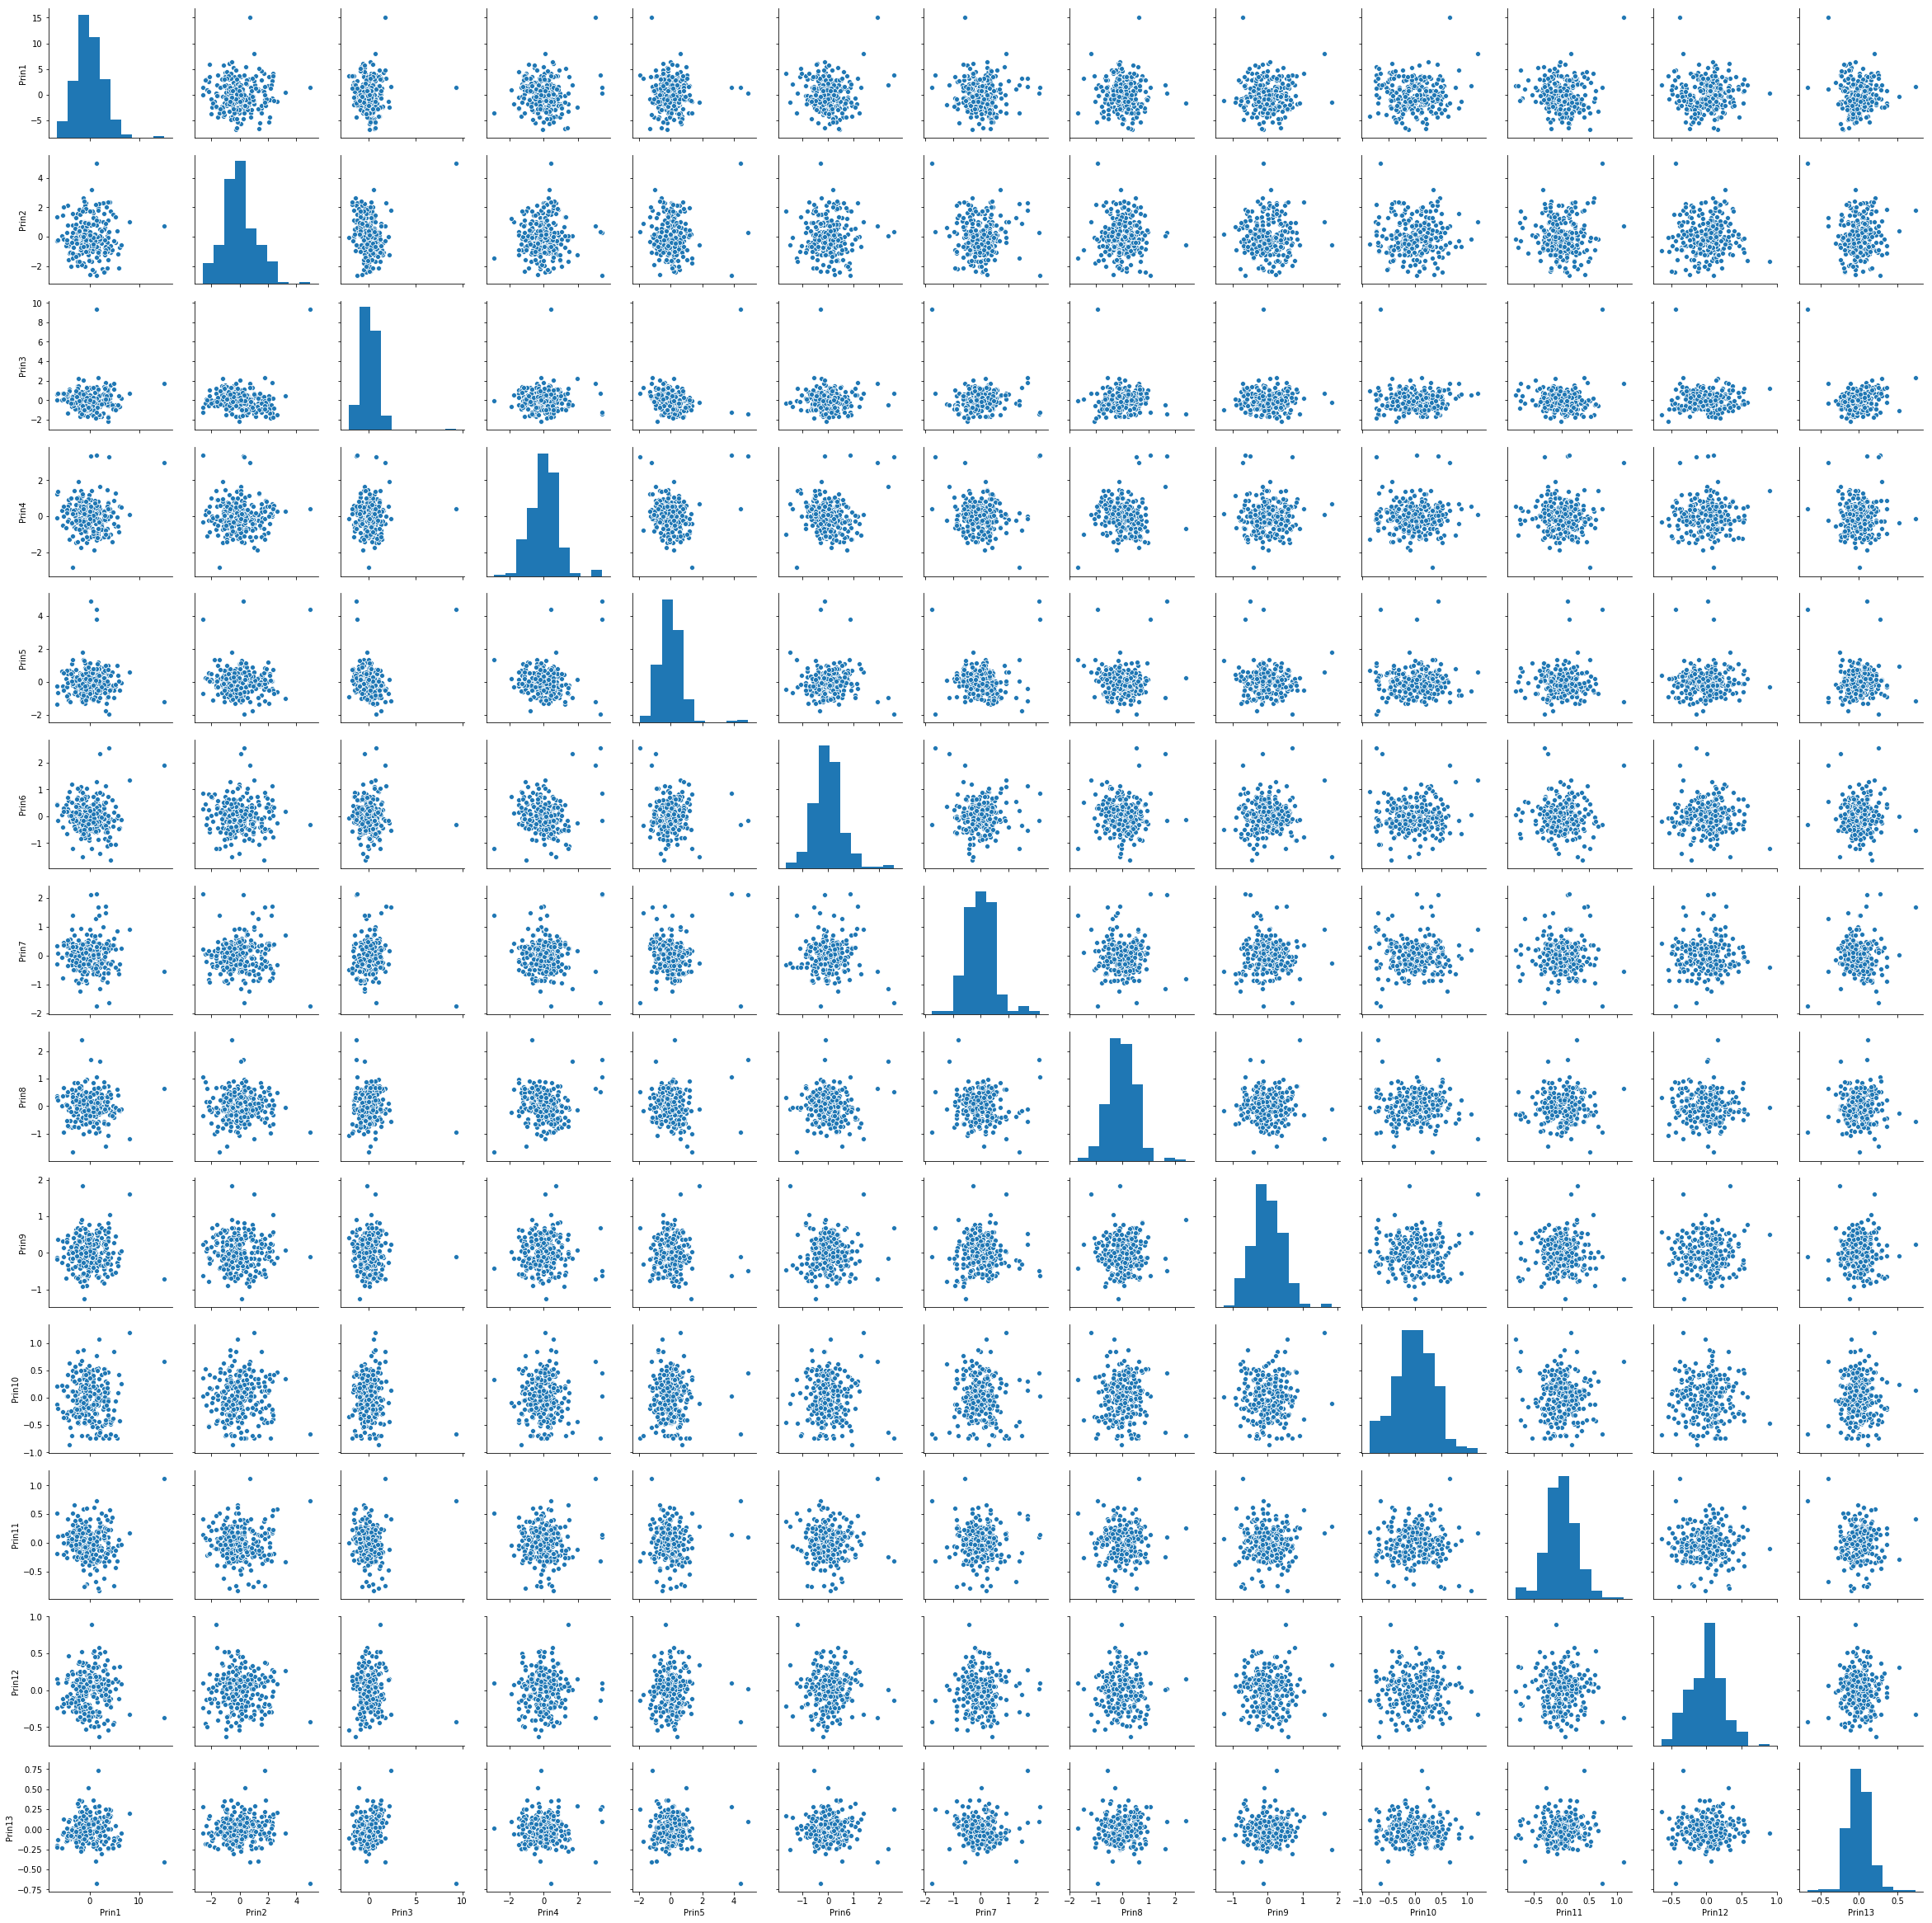

In [16]:
sns.pairplot(df_x_pca)
df_x_pca.corr().round(3)

In [24]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x_var = df_x_pca.columns
df_x_pca_const = sm.add_constant(df_x_pca[x_var[:3]])

X_train, X_test, y_train, y_test = train_test_split(df_x_pca_const, df_y, test_size = 0.3, random_state= 2222)

reg_model = sm.OLS(y_train,X_train).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     72.82
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.90e-30
Time:                        16:54:28   Log-Likelihood:                -549.42
No. Observations:                 176   AIC:                             1107.
Df Residuals:                     172   BIC:                             1120.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1992      0.419     45.854      0.0

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [38]:
reg.coef_

array([ 0.        , -5.31362847,  3.08249678])

In [39]:
reg.intercept_ 

64.55496547657911

In [40]:
reg.predict(X_test)

array([70.83163576, 64.59771061, 63.79716915, 80.21176534, 55.29732935,
       65.87871136, 65.03751948, 74.82181128, 60.17531196])

In [41]:
reg.score(X_test,y_test)

-0.4440962048038217

In [42]:
reg.score(X_train,y_train)

0.6845751440771901